In [14]:
%reload_ext autoreload
%autoreload 2

import pickle
import json
import sys
import os

import base64

import numpy as np
import pandas as pd

sys.path.append('diva-python/src/')
from train import combining_classifiers

In [15]:
def create_df_features(input_features_file):
    
    with open(os.path.join('inference', input_features_file), "r") as file:
        json_data = json.load(file)

    image_features = {}

    for label_data, feature_data_str in json_data.items():
        feature_data_str_ascii = feature_data_str.encode("ascii")
        feature_data = base64.b64decode(feature_data_str_ascii)
        image_features[label_data] = np.frombuffer(feature_data, dtype=np.uint8).astype(np.float)

    data_df = pd.DataFrame({str(label): image_features[label] for label in image_features})
    
    return data_df

In [20]:
# open and load features for all the voxels of 1 packet in json format
input_features_file = 'packet1.json'

data_df = create_df_features(input_features_file) 

In [21]:
classifier_path = 'Model/classif_2nd_round.pckl'

liste_learner = pickle.load(open(classifier_path, 'rb'))

In [22]:
liste_learner[0]

{'c1': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50,
                        n_jobs=None, oob_score=True, random_state=None,
                        verbose=0, warm_start=False),
 'c2': AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                          criterion='gini',
                                                          max_depth=10,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_

In [23]:
rf_2 = liste_learner[1]['c1']

keys = list(data_df.columns)
keys.extend(['log_proba RF_31', 'log_proba adatree_31', 'log_proba adasvd_31',
             'log_proba catboost_31', 'log_proba gpc', 'log_proba xgbc_35'])
values = rf_2.feature_importances_

In [24]:
assert len(keys) == len(values)

feat_imp_dict = dict(zip(keys, values))
1/len(keys)

0.02702702702702703

In [25]:
for key, value in sorted(feat_imp_dict.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

log_proba catboost_31: 0.10445449316494317
log_proba RF_31: 0.09697961510443576
log_proba gpc: 0.08899970841340693
log_proba adasvd_31: 0.08155151411194596
MAXIMUM_5x5x5: 0.06254940563743547
GAUSSIAN_3x3x3: 0.05733546374802421
MEAN_7x7x7: 0.05612727257958917
STDDEV_5x5x5: 0.04441256133307712
STDDEV_7x7x7: 0.042455238286355175
MAXIMUM_7x7x7: 0.0408290359370924
GRADIENT_7x7x7: 0.03963126823854171
GAUSSIAN_5x5x5: 0.036298790862021375
ENTROPY_7x7x7: 0.034543702408205874
GAUSSIAN_7x7x7: 0.030692472558097775
log_proba adatree_31: 0.02922046698074686
MAXIMUM_3x3x3: 0.02663404742037132
MEAN_5x5x5: 0.02327523405689756
GRADIENT_5x5x5: 0.019140156719659306
ENTROPY_5x5x5: 0.012511232708871143
log_proba xgbc_35: 0.010530976714788358
VALUE_M_BLUR_7x7x7: 0.008416672196587741
GRADIENT_3x3x3: 0.00780979831348879
LAPLACE_5x5x5: 0.006099597735503215
LAPLACE_7x7x7: 0.0055161652838404684
MEAN_3x3x3: 0.0051688355464671615
VALUE_M_BLUR_5x5x5: 0.004831247987510898
STDDEV_3x3x3: 0.0044987644698912
VALUE_M_BLUR

In [27]:
catboost_2 = liste_learner[1]['c4']

keys = list(data_df.columns)
keys.extend(['log_proba RF_31', 'log_proba adatree_31', 'log_proba adasvd_31',
             'log_proba catboost_31', 'log_proba gpc', 'log_proba xgbc_35'])

In [53]:
values = catboost_2.get_feature_importance(prettified=False)

In [55]:
feat_imp = pd.DataFrame(index=keys)

feat_imp['Catboost'] = values

In [56]:
feat_imp

,Catboost
PIXEL_VALUE,0.142861
MINIMUM_3x3x3,0.161394
MINIMUM_5x5x5,0.007715
MINIMUM_7x7x7,0.000000
MAXIMUM_3x3x3,1.132105
MAXIMUM_5x5x5,5.706833
MAXIMUM_7x7x7,15.331273
MEAN_3x3x3,0.639419
MEAN_5x5x5,1.096408
MEAN_7x7x7,7.183289


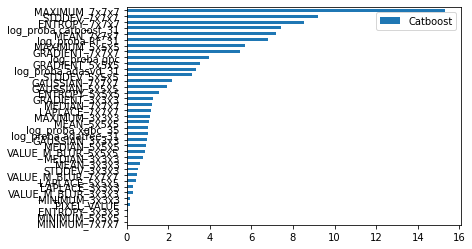

In [63]:
feat_imp.sort_values(by='Catboost', ascending=True).plot.barh()